In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from classification_utils import *
import pickle

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5148.794751,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.084281,0.365536,0.385427,1.357545,14.574041
std,0.499031,18496.606420,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.109621,0.408358,0.390777,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.017751,0.136692,0.119116,0.010526,0.104251
50%,1.000000,57.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.045752,0.230747,0.268594,0.043478,0.238606
75%,1.000000,2041.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.088862,0.451218,0.491767,0.949402,24.144412
max,1.000000,399555.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,0.529903,2.183383,1.723913,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

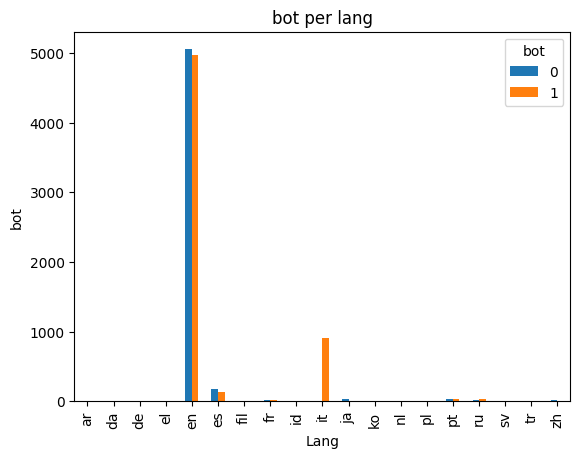

In [6]:
plot_lang_hist(data)

In [7]:
data = discretize_data(data, ["lang"])

In [8]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903,4
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495,4
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008,9
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619,4


In [9]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'lang_num']


In [10]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
1124632188,1517221819,53,60.055556,15.833333,0.000000,0.000000,0.111111,0.0,0.0,0.000000,0.000000,0.000000,0.055556,0.229061,4
466485845,1484745516,64,86.229508,18.335383,0.021858,0.005464,0.078552,0.0,0.0,0.343579,0.831492,1.063947,1.088115,14.344599,9
1176348397,1518716896,19,47.727273,10.863636,0.045455,0.000000,0.090909,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
2368330536,1551675956,2041,64.801724,14.310345,0.000000,0.318966,0.129310,0.0,0.0,0.077586,0.267519,0.393616,0.017241,0.130170,4
2360091846,1551219413,43,65.589474,13.894737,0.000000,0.368421,0.126316,0.0,0.0,0.052632,0.223297,0.297472,0.063158,0.243247,4


In [11]:
train_label.head()

1124632188    1
466485845     1
1176348397    0
2368330536    0
2360091846    1
Name: bot, dtype: int64

### Usage of Lang

In [12]:
# To use GaussianNB we have to have gaussian distributed data, so apply standard scaler

scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [13]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_X, train_label)

#predict on the test set
train_pred_gnb = gnb.predict(train_X)
test_pred_gnb = gnb.predict(test_X)

In [14]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8412166356300435
Accuracy test set  0.8459310744280336
Precision train set  0.8566563030710467
Recall train set  0.8412166356300435
F1 score train set  0.83812079648349
Support train set  (array([0.93151159, 0.79066615]), array([0.71356651, 0.95374912]), array([0.80810203, 0.86458444]), array([3774, 4281]))


In [15]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.94      0.72      0.81      1618
         >50       0.79      0.96      0.87      1835

    accuracy                           0.85      3453
   macro avg       0.87      0.84      0.84      3453
weighted avg       0.86      0.85      0.84      3453



In [16]:
# cross validation
scores = cross_validate(gnb, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.002474705378214518
Score time  0.0011119842529296875
Test score  0.8410924891371819
Train score  0.8405959031657355


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


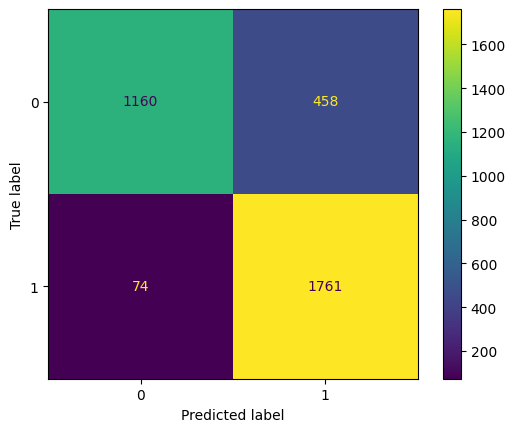

In [17]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb, test_X, test_label)
plt.show() 

In [18]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

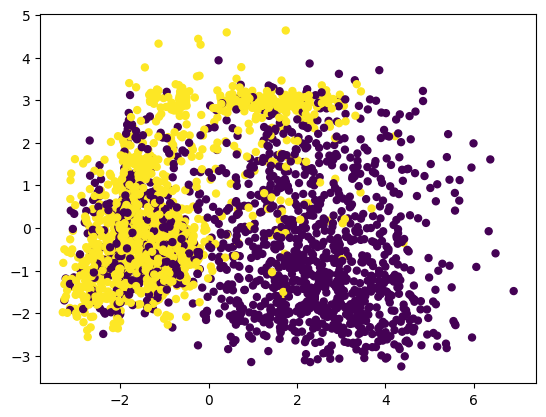

In [19]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25);

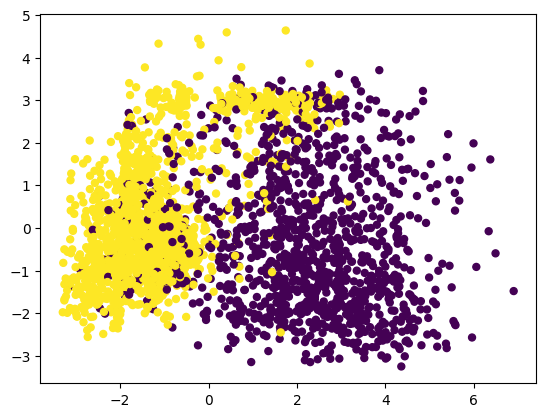

In [20]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25);

### Save the model

In [21]:
with open("models_checkpoints/bn_lang.bin", "wb") as f:
    pickle.dump(gnb, f)

### How lang is biased

In [22]:
# take a non bot user
non_bot_users = test_set[test_label==0]
total_bot = (test_label==0).sum()

In [23]:
test_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
531130708,1490181424,53,78.530821,17.071602,0.005109,0.000000,0.000000,0.0,0.0,0.016689,0.136250,0.121692,0.006999,0.089590,4
2352334164,1550788531,81,61.806061,13.721212,0.000000,0.315152,0.030303,0.0,0.0,0.042424,0.201555,0.253299,0.030303,0.171420,4
2372379782,1551905877,60,62.571429,13.928571,0.000000,0.250000,0.107143,0.0,0.0,0.053571,0.261837,0.295418,0.053571,0.261837,4
1095345769,1516284972,40985,49.712527,11.192013,0.109956,0.711160,0.155361,0.0,0.0,0.089989,0.351378,0.439399,4.298687,26.059244,4
84482024,1414203027,24704,34.358336,14.694444,0.025179,0.129605,0.054333,0.0,0.0,0.009807,0.103781,0.078889,2.940101,24.827464,4


In [24]:
non_bot_users_X = scaler.transform(non_bot_users.values)

In [25]:
gnb.predict(non_bot_users_X).sum()/total_bot

0.2830655129789864

In [26]:
for lang in data.lang_num.unique():
    # substitute lang_num with 9 (italian), all the italian are bots
    modified_non_bot_users = non_bot_users.copy()
    modified_non_bot_users["lang_num"] = lang
    modified_non_bot_users.head()
    modified_non_bot_users_X = scaler.transform(modified_non_bot_users.values)
    print(f"number bot classified with lang_num = {lang} : {gnb.predict(modified_non_bot_users_X).sum()/total_bot}")

number bot classified with lang_num = 4 : 0.27935723114956734
number bot classified with lang_num = 9 : 0.2880098887515451
number bot classified with lang_num = 7 : 0.28244746600741655
number bot classified with lang_num = 15 : 0.3003708281829419
number bot classified with lang_num = 5 : 0.2799752781211372
number bot classified with lang_num = 17 : 0.30593325092707047
number bot classified with lang_num = 14 : 0.3003708281829419
number bot classified with lang_num = 12 : 0.29480840543881337
number bot classified with lang_num = 8 : 0.2867737948084054
number bot classified with lang_num = 18 : 0.30716934487021014
number bot classified with lang_num = 10 : 0.28986402966625463
number bot classified with lang_num = 2 : 0.2799752781211372
number bot classified with lang_num = 11 : 0.29171817058096416
number bot classified with lang_num = 1 : 0.28182941903584674
number bot classified with lang_num = 0 : 0.2830655129789864
number bot classified with lang_num = 13 : 0.2972805933250927
number b

### Removed Lang attribute for classification

In [27]:
del train_set["lang_num"]

In [28]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
1124632188,1517221819,53,60.055556,15.833333,0.000000,0.000000,0.111111,0.0,0.0,0.000000,0.000000,0.000000,0.055556,0.229061
466485845,1484745516,64,86.229508,18.335383,0.021858,0.005464,0.078552,0.0,0.0,0.343579,0.831492,1.063947,1.088115,14.344599
1176348397,1518716896,19,47.727273,10.863636,0.045455,0.000000,0.090909,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2368330536,1551675956,2041,64.801724,14.310345,0.000000,0.318966,0.129310,0.0,0.0,0.077586,0.267519,0.393616,0.017241,0.130170
2360091846,1551219413,43,65.589474,13.894737,0.000000,0.368421,0.126316,0.0,0.0,0.052632,0.223297,0.297472,0.063158,0.243247


In [29]:
del test_set["lang_num"]

In [30]:
test_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
531130708,1490181424,53,78.530821,17.071602,0.005109,0.000000,0.000000,0.0,0.0,0.016689,0.136250,0.121692,0.006999,0.089590
2352334164,1550788531,81,61.806061,13.721212,0.000000,0.315152,0.030303,0.0,0.0,0.042424,0.201555,0.253299,0.030303,0.171420
2372379782,1551905877,60,62.571429,13.928571,0.000000,0.250000,0.107143,0.0,0.0,0.053571,0.261837,0.295418,0.053571,0.261837
1095345769,1516284972,40985,49.712527,11.192013,0.109956,0.711160,0.155361,0.0,0.0,0.089989,0.351378,0.439399,4.298687,26.059244
84482024,1414203027,24704,34.358336,14.694444,0.025179,0.129605,0.054333,0.0,0.0,0.009807,0.103781,0.078889,2.940101,24.827464


In [31]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [32]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb2 = GaussianNB()
gnb2.fit(train_X, train_label)

#predict on the test set
train_pred_gnb = gnb2.predict(train_X)
test_pred_gnb = gnb2.predict(test_X)

In [33]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.834885164494103
Accuracy test set  0.838401390095569
Precision train set  0.8473392324237988
Recall train set  0.834885164494103
F1 score train set  0.8320731172812798
Support train set  (array([0.91283784, 0.78959764]), array([0.71595125, 0.93973371]), array([0.8024948 , 0.85814846]), array([3774, 4281]))


In [34]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.92      0.72      0.81      1618
         >50       0.79      0.94      0.86      1835

    accuracy                           0.84      3453
   macro avg       0.86      0.83      0.83      3453
weighted avg       0.85      0.84      0.84      3453



In [35]:
# cross validation
scores = cross_validate(gnb, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.002359628677368164
Score time  0.0012277762095133464
Test score  0.8345127250155183
Train score  0.8346989447548107


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


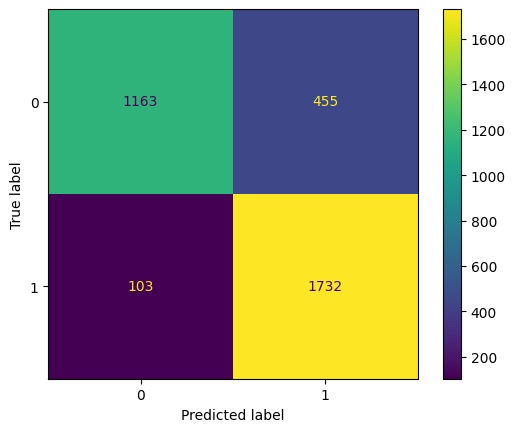

In [36]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb2, test_X, test_label)
plt.show() 

In [37]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

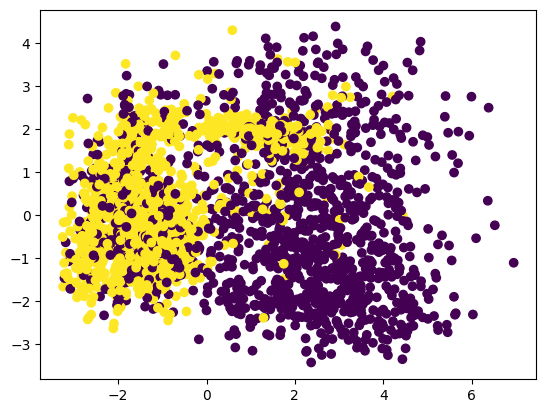

In [38]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values);

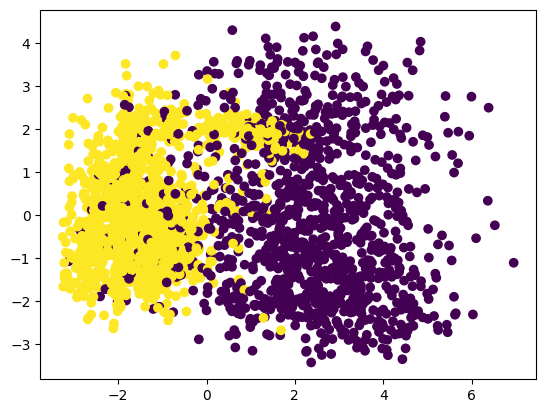

In [39]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb);

### Save Model

In [40]:
with open("models_checkpoints/bn_no_lang.bin", "wb") as f:
    pickle.dump(gnb, f)